# Lead Scoring Case Study :::

## Using Logistic Regression with RFE (Recursive Feature Elimination) method

### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

### Business Goal:

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data:

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.



## Importing necessary libraries

In [272]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [273]:
# Importing required librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks

In [274]:
#Setting options for displaying maximum rows and columns as there are high number of columns in the dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

<b>Please note that below path is a local directory path. <i>Kindly change the path to the respective directory path from where this jupyter notebook is being executed </i></b>

In [275]:
# Reading the csv file.

leads_df=pd.read_csv(r'E:\UPgrad\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Data Routine Check

In [276]:
leads_df.shape

(9240, 37)

In [277]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [278]:
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   From the above statistics, we can observe that there are few outliers present in the data and we will be treating them moving formward.
 
</font></p>

In [279]:
#Identifying the percentage of null values for all the columns in a dataframe

round(100*(leads_df.isnull().sum()/len(leads_df)),2).to_frame()

0
Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                        26.63
Specialization                                 15.56
How did you hear about X Education             23.89
What is your current occupation                29.11
What matters most to you in choosing a course  29.32
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                           0.00
Through Recommendations                         0.00
Receive More Updates About Our Courses          0.00
Tags                                           36.29
Lead Quality                                   51.59
Update me on Supply Chain Content               0.00
Get updates on DM Content                       0.00
Lead Profile                                   29.32
City                                           15.37
Asymmetrique Activity Index                    45.65
Asymmetrique Profile Index                     45.65
Asymmetrique Activity Score                    45.65
Asymmetrique Profile Score                     45.65
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview          0.00
Last Notable Activity                           0.00

In [280]:
# Identifying if any column exists with only null values

leads_df.isnull().all(axis=0).any()

False

In [281]:
#dropping all those columns which has only one unique value
#below is the list of all the columns with the count of their unique values.

leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [282]:
#Magazine
#Receive More Updates About Our Courses
#Update me on Supply Chain Content
#Get updates on DM Content
#I agree to pay the amount through cheque

#above columns have only one unique value in them and hence they dont account for the successful analysis of a dataset
#Hence leads dataframe will only have those columns with more than 1 unique value

leads_df = leads_df.loc[:,leads_df.nunique()!=1]

In [283]:
leads_df.shape

(9240, 32)

In [284]:
# Also, there are few columns with values as "Select" which means that customer din't select any value for those columns
# Hence, that value can be considered as null
# Replacing all the "Select" values for all such columns with NAN values

leads_df = leads_df.replace('Select', np.nan)

### Dropping unncessary columns

In [285]:
#Dropping the "prospect_id column as it will not have any impact on model output"

leads_df.drop('Prospect ID', axis=1, inplace = True)

In [286]:
leads_df.shape

(9240, 31)

In [287]:
# Dropping the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' ,'Asymmetrique Activity Index' & 'Asymmetrique Profile Index' 
#with categories as "High" , "Medium" and "Low" 
#As these columns have almost around 50% null values

leads_df.drop('Asymmetrique Activity Score', axis=1, inplace=True)
leads_df.drop('Asymmetrique Profile Score', axis=1, inplace= True)
leads_df.drop('Asymmetrique Activity Index', axis=1, inplace=True)
leads_df.drop('Asymmetrique Profile Index', axis=1, inplace=True)

In [288]:
leads_df.shape

(9240, 27)

In [289]:
leads_df.head(2)

Lead Number Lead Origin     Lead Source Do Not Email Do Not Call  \
0       660737         API      Olark Chat           No          No   
1       660728         API  Organic Search           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   

             Last Activity Country Specialization  \
0  Page Visited on Website     NaN            NaN   
1             Email Opened   India            NaN   

  How did you hear about X Education What is your current occupation  \
0                                NaN                      Unemployed   
1                                NaN                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   

                          Tags      Lead Quality Lead Profile City  \
0  Interested in other courses  Low in Relevance          NaN  NaN   
1                      Ringing               NaN          NaN  NaN   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened

In [290]:
# Dropping the columns 'What matters most to you in choosing a course' as all the leads need to have better career prospects 
#and objective of choosing any such course remains the same for all leads. hence dropping this column as it will be useless while model building

leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads_df.shape

(9240, 26)

In [291]:
# Dropping the "Country" column as geographical location does not really matter much 
# when there are online courses being offerend by any company and any users or customers across the world can enroll for such courses

leads_df.drop('Country', axis=1, inplace=True)
leads_df.shape

(9240, 25)

In [292]:
# And for that matter with the same reason as mentioned above for "Country" column
# Dropping the "City" column as well


leads_df.drop('City', axis=1, inplace=True)
leads_df.shape

(9240, 24)

In [293]:
# Dropping the column 'How did you hear about X Education' as it mostly contains null values and 'Select' values 

leads_df.drop('How did you hear about X Education', axis=1, inplace=True)
leads_df.shape

(9240, 23)

In [294]:
leads_df['Lead Source'].isnull().sum()

36

In [295]:
# removing rows where a particular column has few missing values and it is an inportant column and cannot be dropped

leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]
leads_df.shape

(9204, 23)

In [296]:
# Dropping "Lead Number" column as it is just a unique number assigned to each lead and won't have any impact on final outcome.

leads_df.drop('Lead Number' , axis=1, inplace=True)

In [297]:
leads_df.shape

(9204, 22)

In [298]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Univariate Analysis for Categorical Variables :::

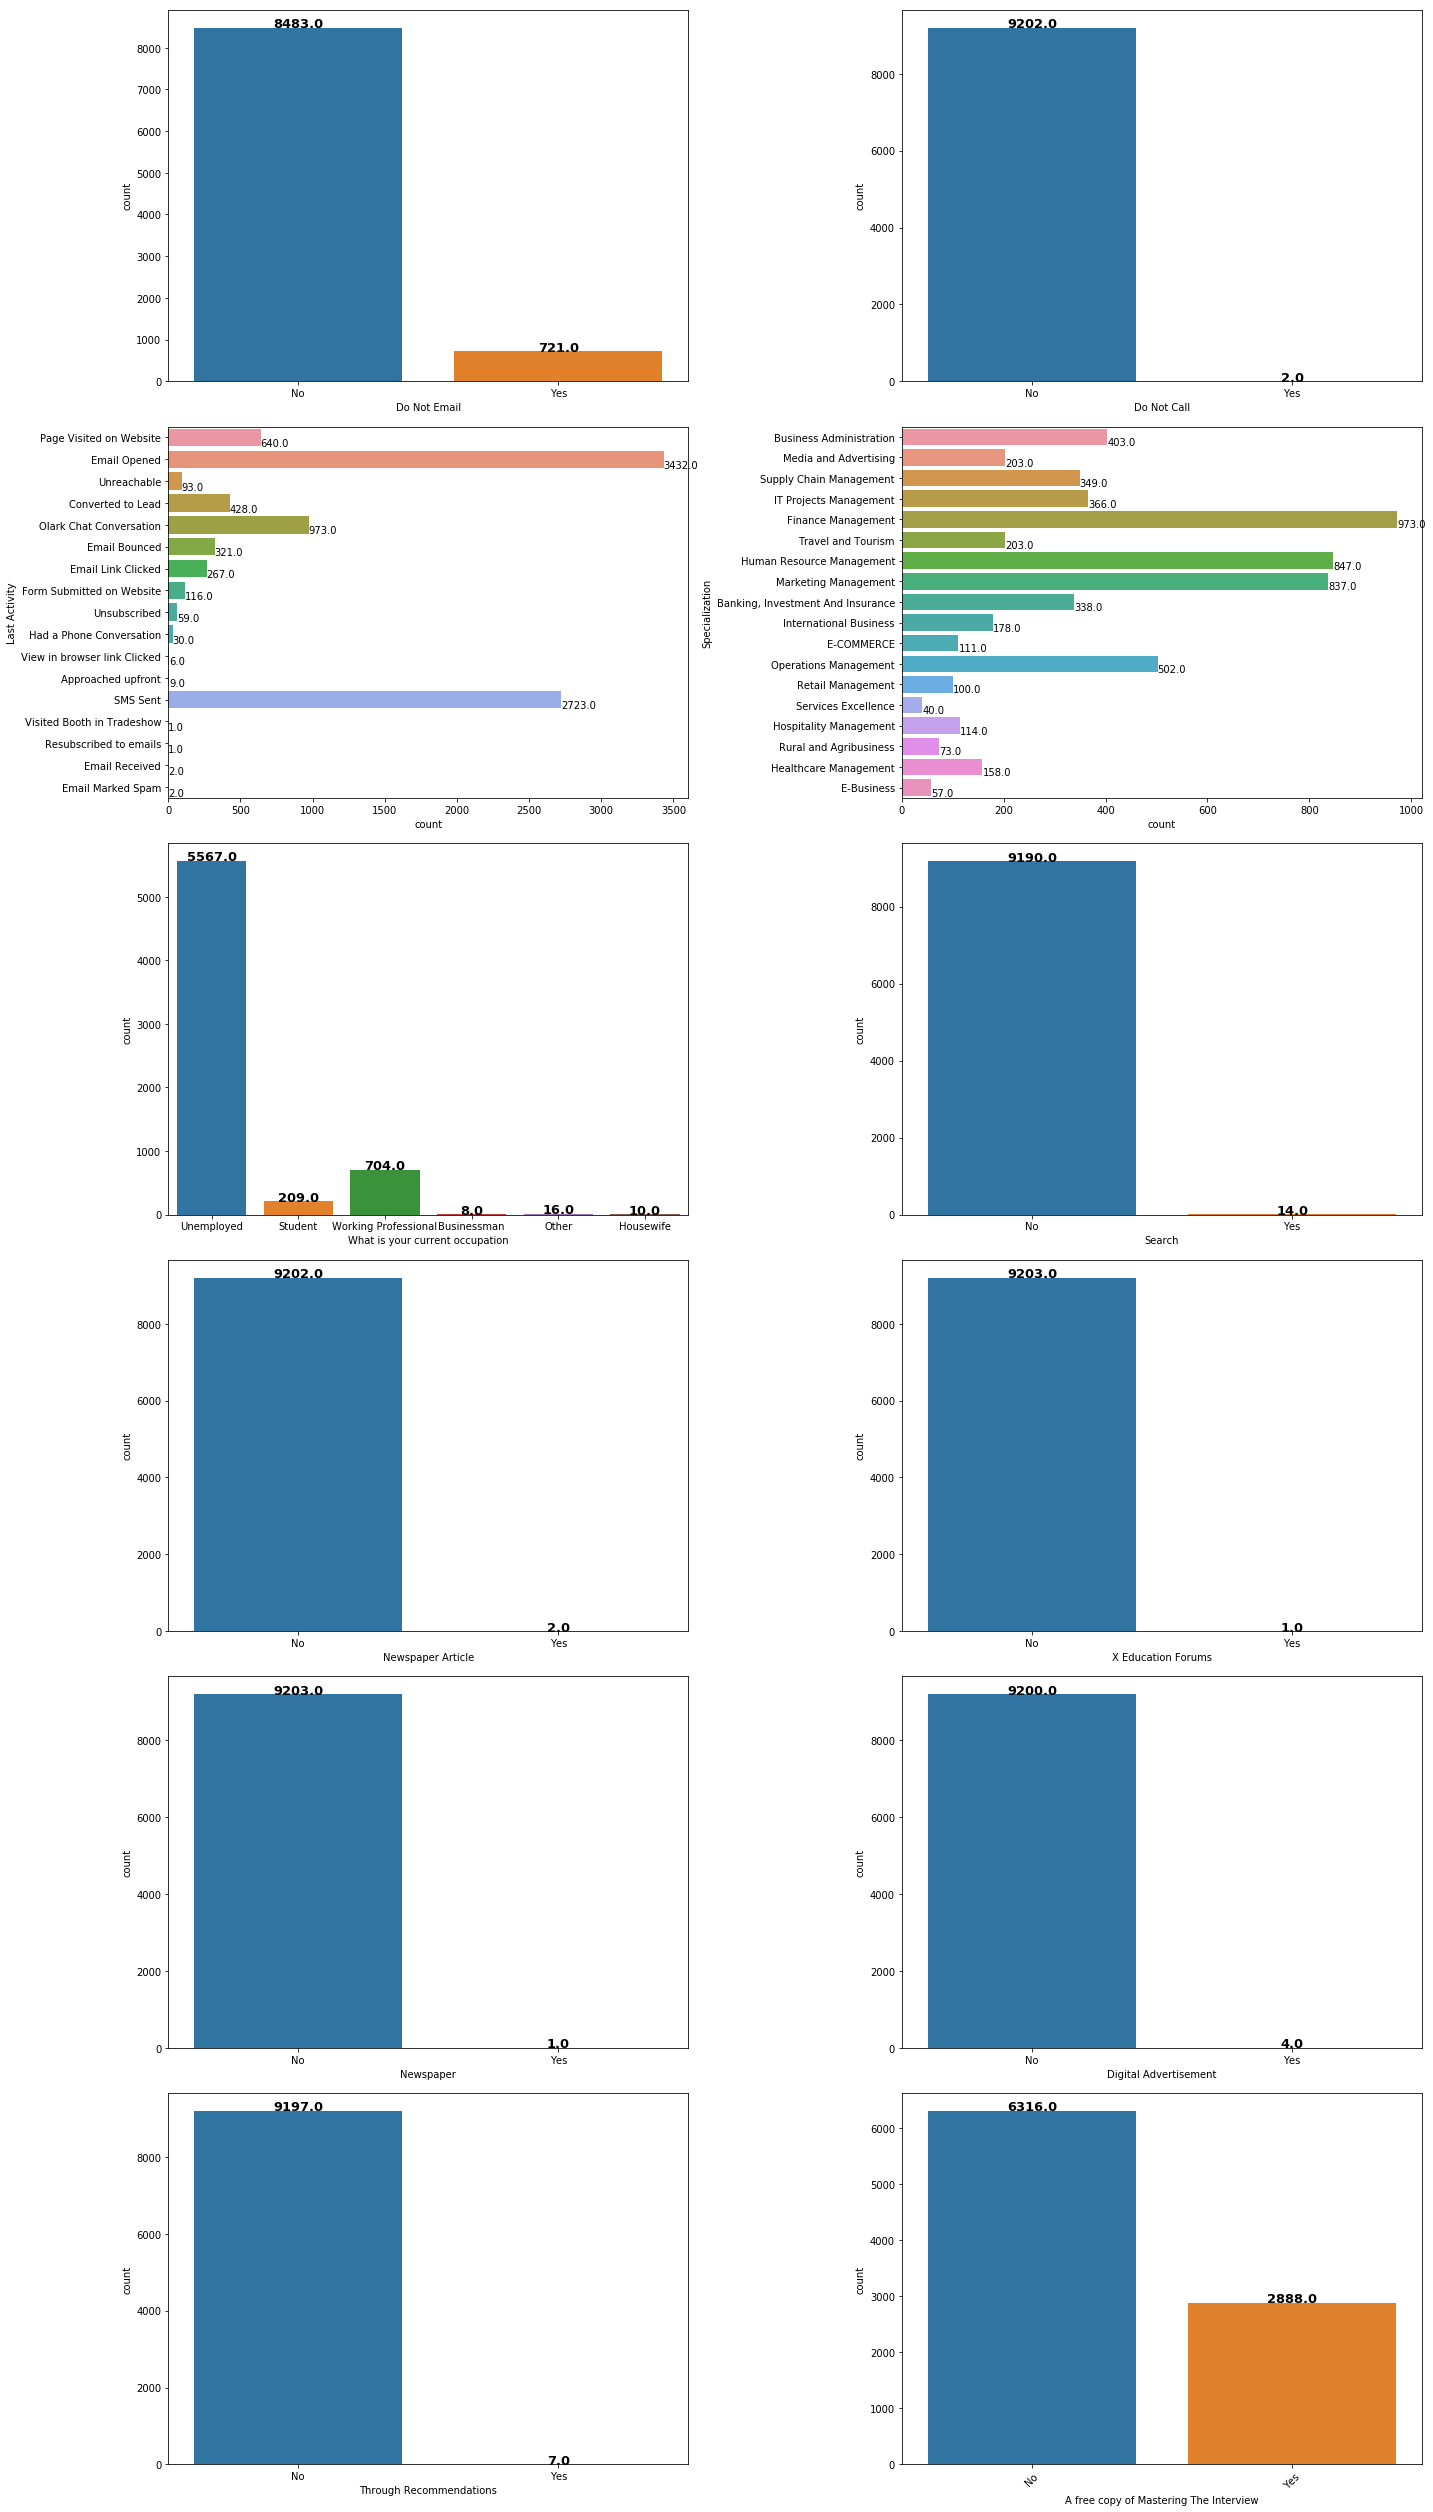

In [299]:
#plotting count plots using seaborn for remaining categorical variables with help of matplotlib library 

fig, axs= plt.subplots(6,2,figsize = (20,35))

# 'Do not Email'
ax = sns.countplot(leads_df['Do Not Email'], ax = axs[0,0])
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)


# 'Do not call'
ax = sns.countplot(leads_df['Do Not Call'], ax = axs[0,1])
xticks(rotation = 45)


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

# Total visits
ax= sns.countplot(y=leads_df['Last Activity'], ax = axs[1,0])

for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


ax= sns.countplot(y=leads_df['Specialization'], ax = axs[1,1])



for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))



# Page Views Per Visit
ax= sns.countplot(leads_df['What is your current occupation'], ax = axs[2,0])
xticks(rotation = 45)


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)



ax= sns.countplot(leads_df['Search'], ax = axs[2,1])
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

                       
ax= sns.countplot(leads_df['Newspaper Article'], ax = axs[3,0])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(leads_df['X Education Forums'], ax = axs[3,1])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(leads_df['Newspaper'], ax = axs[4,0] )

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(leads_df['Digital Advertisement'], ax = axs[4,1])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(leads_df['Through Recommendations'], ax = axs[5,0])


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(leads_df['A free copy of Mastering The Interview'], ax = axs[5,1])


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

plt.tight_layout()
plt.show()

From the above plots we can see that, for the variables "'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',", have very negligible number of values as "Yes"
As most of the values are "No", it will not impact a model output to the great extent. <br>
Hence,  we can drop those variables or features to simplify the model.

Also, We can observe that Last activity like chat conversaion and SMS have more counts than all other activities. <br>
People who are unemployed and working professionals are more interested in enrolling for such courses.


In [300]:
# From the above plots we can see that, for the variables "'Search',
#        'Newspaper Article', 'X Education Forums', 'Newspaper',
#        'Digital Advertisement', 'Through Recommendations',", have very negligible number of values as "Yes"
# As most of the values are "No", it will not impact a model output to the great extent
# Hence we can drop those variables or features to simplify the model

leads_df.drop(leads_df[['Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations']], axis=1, inplace=True)

In [301]:
# Dropping "Lead Profile" column as it has more than 70% missing values

leads_df.drop('Lead Profile', axis=1, inplace=True)

In [302]:
# Dropping "Tags" column as it has more than 30% missing values and also column being a categorical variable,
# there are many unique values present indicating just the current status of the customer.
# which does not sound to be an important variable
# Hence, dropping it

leads_df.drop('Tags', axis=1, inplace=True)

In [303]:
leads_df.shape

(9204, 14)

In [304]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Imputing the missing values

In [305]:
# No missing values for this column

leads_df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

In [306]:
# Imputing missing values with "Median" value for "TotalVisits" column

leads_df['TotalVisits'].replace(np.NaN, leads_df['TotalVisits'].median(), inplace =True)

In [307]:
# Imputing missing values with "Median" value for "Page Views Per Visit" column

leads_df['Page Views Per Visit'].replace(np.NaN, leads_df['Page Views Per Visit'].median(), inplace =True)

In [308]:
# Imputing below column null values with "Not Known" values

leads_df['Last Activity'].fillna("Not Known", inplace = True)
leads_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Not Known                        101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [309]:
leads_df['Specialization'].value_counts()

Finance Management                   973
Human Resource Management            847
Marketing Management                 837
Operations Management                502
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                158
Hospitality Management               114
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [310]:
leads_df['Specialization'].isnull().sum()

3352

In [311]:
# Filling "Specialization" variable null values with "Others" value as there are high number of issing values
# and we can not afford to delete either rows or a column due to important feature

leads_df['Specialization'].fillna("Others", inplace = True)
leads_df['Specialization'].value_counts()

Others                               3352
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [312]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [313]:
leads_df['What is your current occupation'].isnull().sum()

2690

In [314]:
# For the column 'What is your current occupation', there are high number of missing values and also it is an important feature.
# Hence we can not drop the column, also imputing with mode value will mislead the analysis
# so we can safely replace NAN values with "Other" category already a part of the column which specifies it as not present.

leads_df['What is your current occupation'].fillna("Other", inplace = True)
leads_df['What is your current occupation'].value_counts()

Unemployed              5567
Other                   2706
Working Professional     704
Student                  209
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [315]:
#leads_df['Tags'].value_counts()

In [316]:
round(100*(leads_df.isnull().sum()/len(leads_df)),2).to_frame()

0
Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Specialization                           0.00
What is your current occupation          0.00
Lead Quality                            51.64
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00

In [317]:
leads_df.shape

(9204, 14)

In [318]:
#leads_df['Tags']=leads_df['Tags'].replace(np.nan,'Others')

In [319]:
#leads_df['Tags'].value_counts()

In [320]:
#(100*leads_df.groupby('Tags').sum()['Converted']/leads_df.groupby('Tags').count()['Converted']).to_frame()

In [321]:
#we can say that from the above dataframe results that "others" and "In touch with EINS" has the same conversion rate
# hence replacing the "others" value with "In touch with EINS" value

#leads_df['Tags']=leads_df['Tags'].replace('Others','in touch with EINS')


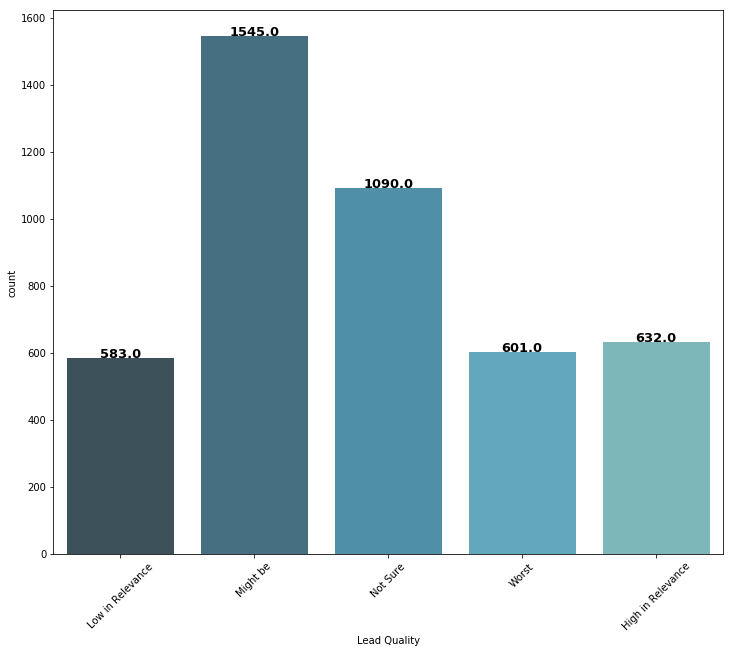

In [322]:
#checking the values distribution for "lead quality" column

plt.figure(figsize=(12, 10))

ax = sns.countplot(leads_df['Lead Quality'], palette =sns.color_palette("GnBu_d"))
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)



In [323]:
# we have "not sure value", we can impute missing values to "Not Sure"

leads_df['Lead Quality']=leads_df['Lead Quality'].replace(np.nan,'Not Sure')


In [324]:
leads_df.shape

(9204, 14)

In [325]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Segmented Univariate Analysis  for Converted flag as either 0 or 1

In [326]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

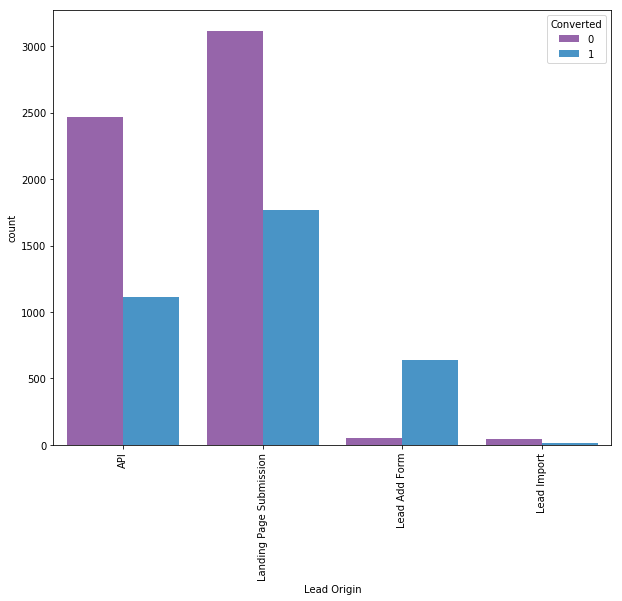

In [327]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Lead Origin', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    API and Landing Page Submission have higher conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than the higherst conversion rate but count of lead are not very high. Lead Import count is very less.
 
</font></p>



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

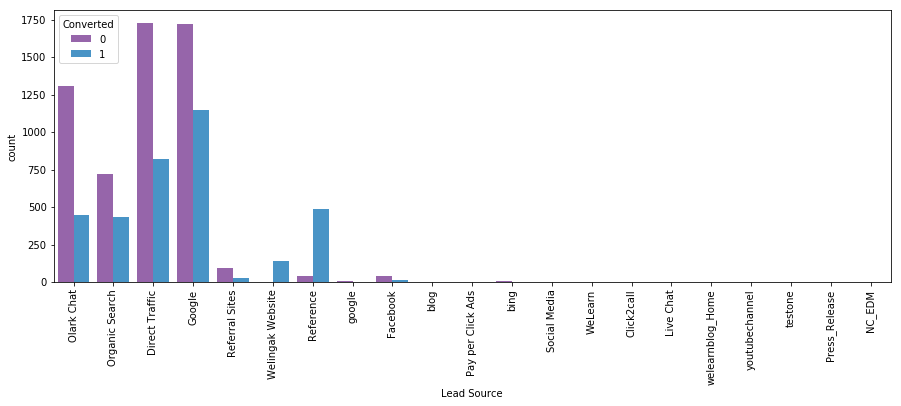

In [328]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Lead Source', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
Googl, Direct traffic, olark chat generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high. <br> <br>
Let's also move forward to check what results will be obtained by modelling.
</font></p>

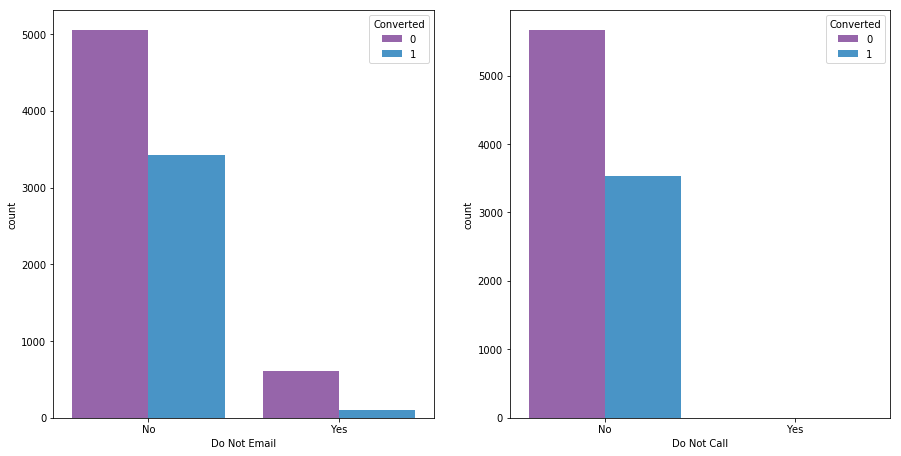

In [329]:
plt.figure(figsize=(15,7.5))

plt.subplot(1, 2, 1)
sns.countplot(x = "Do Not Email", hue = "Converted", palette= ["#9b59b6", "#3498db"], data = leads_df)

plt.subplot(1, 2, 2)
sns.countplot(x = "Do Not Call", hue = "Converted", palette= ["#9b59b6", "#3498db"], data = leads_df)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
    Above features "Do not Email" and "Do not call" have high numbers of leads with response as "No" though conversion rate is low for such responses but It still indicates that if a user wants to be emaild for more iformation on the courses then chances are stil there that they will get converted 
 
</font></p>

(array([0, 1]), <a list of 2 Text xticklabel objects>)

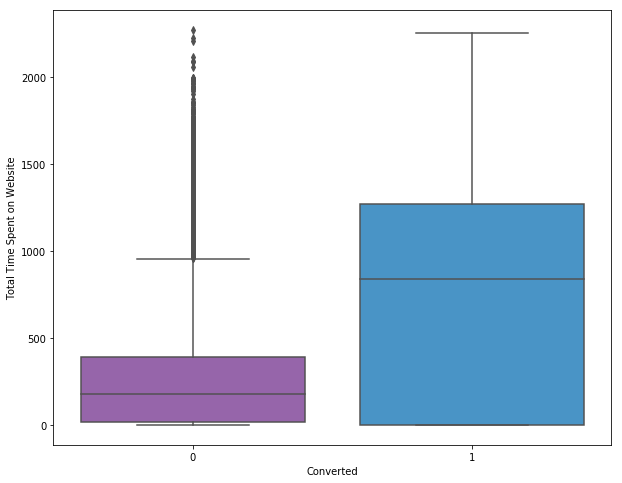

In [330]:
plt.figure(figsize=(10, 8))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted',palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 0)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
Leads spending more time on the website are more likely to be converted. 
</font></p>

(array([0, 1]), <a list of 2 Text xticklabel objects>)

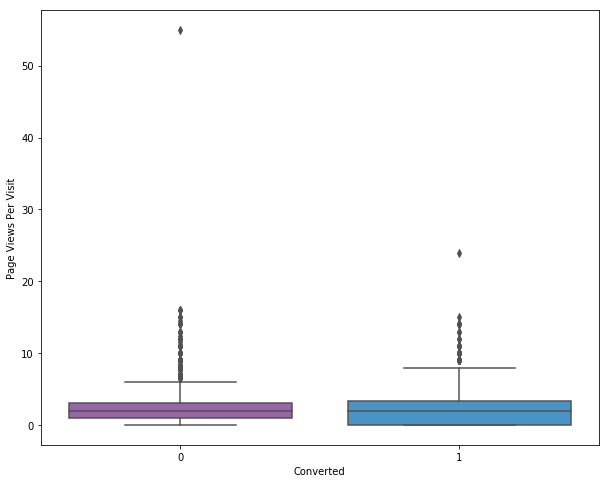

In [331]:
plt.figure(figsize=(10, 8))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 0)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
Nothing can be said for the feature "Page views per visit" as we can clearly see that conversion rate is same for both 0 and 1. Hence it may not be a real factor for the final conversion rate.
</font></p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

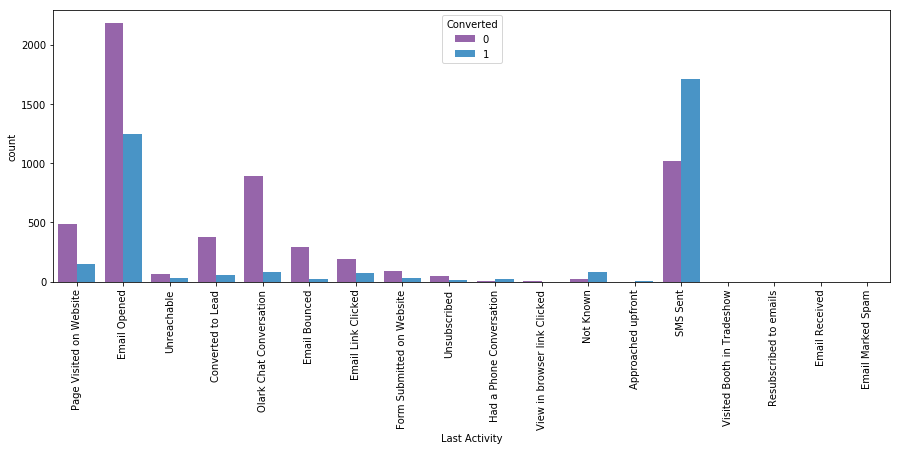

In [332]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Last Activity', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)



<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
Most of the leads have their last activity as "Email opened". Conversion rate for leads with last activity as "SMS Sent" is really high. <br> Let's check further during modeling whether the same information captured during modeling or not
</font></p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

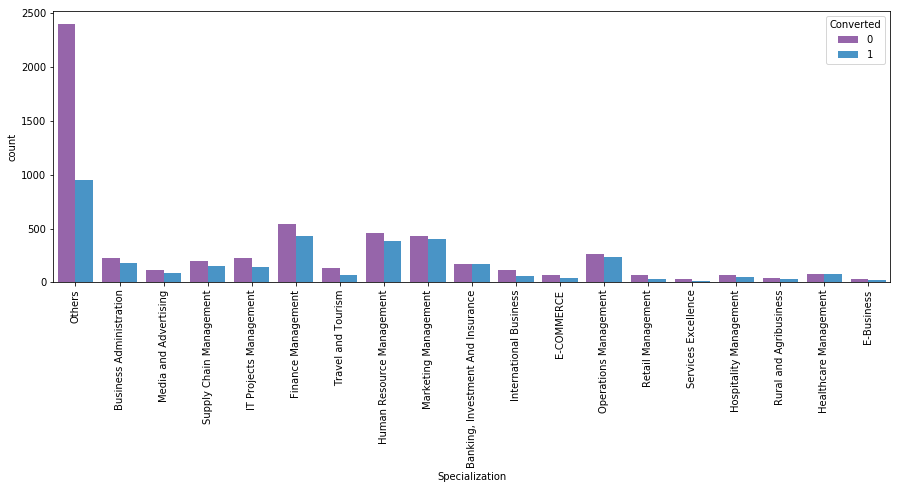

In [333]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Specialization', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)



<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
    We can observe from the above plot for "Specialization" feature that we really can't say about what value can be most effective for higher conversion rate. Almost all the categories have decent amount of leads assigned to them also conversion rate is low. Hence we should focus more on such variables where conversion rate is higher.
</font></p>

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

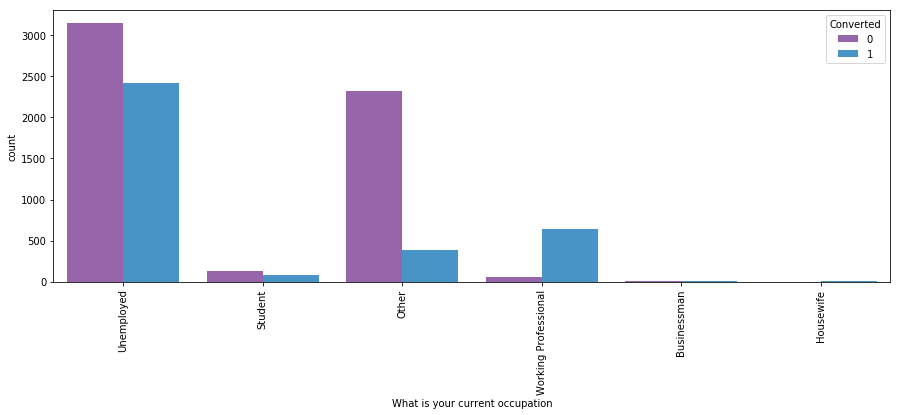

In [334]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
   "Unemployed" category has highest number of leads as expected as they are the people who are searching for various options for career aspects. <br><br>But "Working professional" category has the high conversion rate among all the others even though number of leads belonging to that category is not high.
</font></p>

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

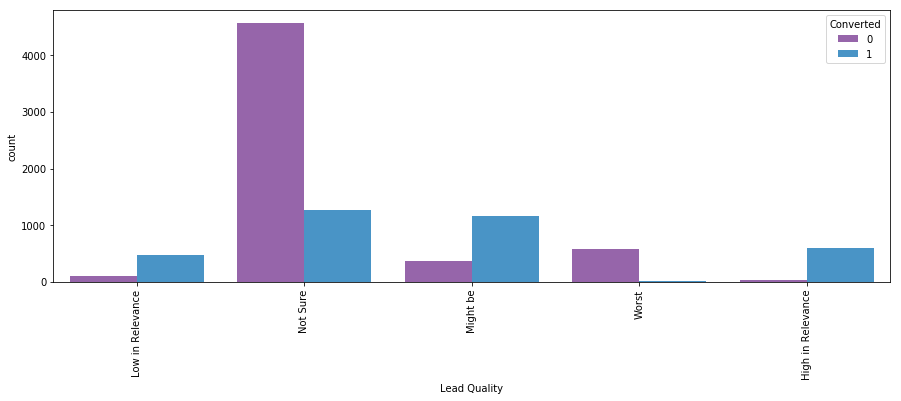

In [335]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Lead Quality', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
   We can infer that "Lead Quality" feature with values as high, low and might be as higher conversion rate among all the others though the count of leads is highest for "Not sure" category.
</font></p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

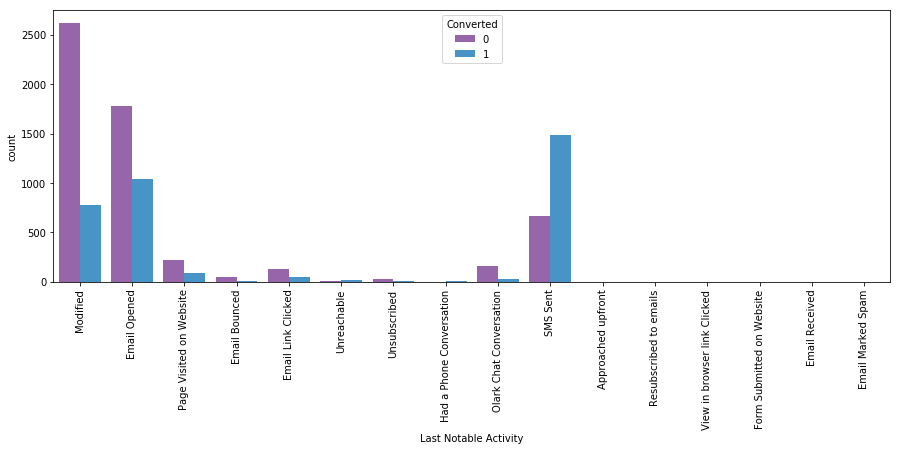

In [336]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', palette= ["#9b59b6", "#3498db"], data = leads_df)
xticks(rotation = 90)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   <u> Inferences: </u> <br>
   We can infer that "Last Notable Activity" feature categories are mainly related to SMS, chat converation and Emails. 
 Most of the leads have their last activity related to emails. But SMS category has highest converson rate.
</font></p>

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    There are no missing values present in the data now.
 
</font></p>

In [337]:
#the data is ready now without any missing values

round(100*(leads_df.isnull().sum()/len(leads_df)),2).to_frame()

0
Lead Origin                             0.0
Lead Source                             0.0
Do Not Email                            0.0
Do Not Call                             0.0
Converted                               0.0
TotalVisits                             0.0
Total Time Spent on Website             0.0
Page Views Per Visit                    0.0
Last Activity                           0.0
Specialization                          0.0
What is your current occupation         0.0
Lead Quality                            0.0
A free copy of Mastering The Interview  0.0
Last Notable Activity                   0.0

## Outliers check and treatment

In [338]:
#let's first check the no of numeric variables and statistics around them.

leads_df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9204.000000  9204.000000                  9204.000000   
mean      0.383746     3.449587                   489.005541   
std       0.486324     4.824662                   547.980340   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    14.000000   
50%       0.000000     3.000000                   250.000000   
75%       1.000000     5.000000                   938.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9204.000000  
mean               2.364923  
std                2.145999  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

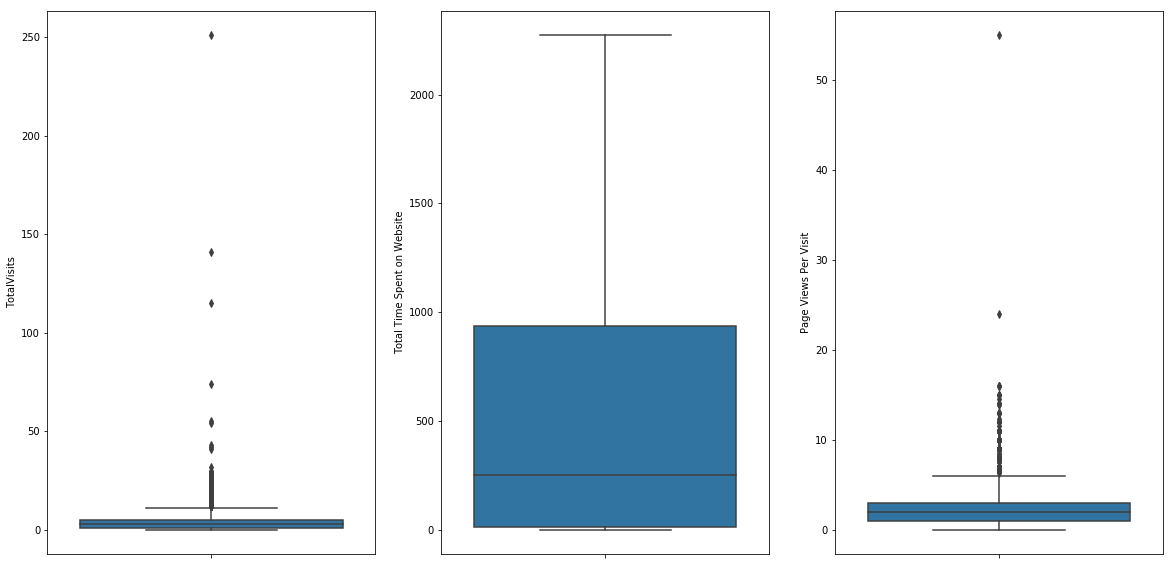

In [339]:
# Outliers check for numeric variables and handle them

plt.figure(figsize=(20, 10))

# subplot 1: TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(y=leads_df['TotalVisits'])

# subplot 1: Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(y=leads_df['Total Time Spent on Website'])

# subplot 1: Page Views Per Visit
plt.subplot(1, 3, 3)
sns.boxplot(y=leads_df['Page Views Per Visit'])

In [340]:
# rows before deleting outliers
leads_df.shape

(9204, 14)

In [341]:
# Outliers data removal with cap of 5% on both the sides.

Q1 = leads_df['TotalVisits'].quantile(0.05)
Q3 = leads_df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_df['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads_df['Page Views Per Visit'].quantile(0.05)
Q3 = leads_df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads_df.shape
#Rows after removing outliers

(9173, 14)

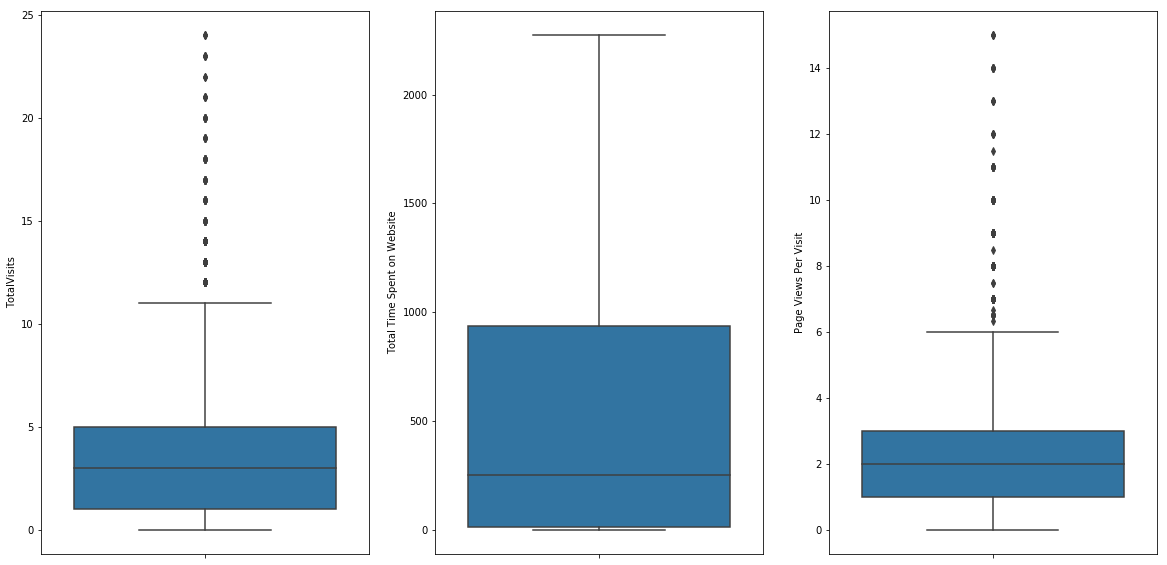

In [342]:
#plotting the numeric variables again to see their plot after outlier data removal.

plt.figure(figsize=(20, 10))

# subplot 1: TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(y=leads_df['TotalVisits'])

# subplot 1: Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(y=leads_df['Total Time Spent on Website'])

# subplot 1: Page Views Per Visit
plt.subplot(1, 3, 3)
sns.boxplot(y=leads_df['Page Views Per Visit'])

In [343]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9173 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               9173 non-null object
Lead Source                               9173 non-null object
Do Not Email                              9173 non-null object
Do Not Call                               9173 non-null object
Converted                                 9173 non-null int64
TotalVisits                               9173 non-null float64
Total Time Spent on Website               9173 non-null int64
Page Views Per Visit                      9173 non-null float64
Last Activity                             9173 non-null object
Specialization                            9173 non-null object
What is your current occupation           9173 non-null object
Lead Quality                              9173 non-null object
A free copy of Mastering The Interview    9173 non-null object
Last Notable Activity                     9173 non-null object
dtypes: flo

In [344]:
leads_df.shape

(9173, 14)

### Replacing binary variables with 0 and 1 / Creation of dummy variables for categorical features

In [345]:
#Converting some variables (Yes/No) to 0/1

vars_list =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_df[vars_list] = leads_df[vars_list].apply(binary_map)
leads_df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation      Lead Quality  \
0                      Unemployed  Low in Relevance   
1                      Unemployed          Not Sure   
2                         Student          Might be   
3                      Unemployed          Not Sure   
4                      Unemployed          Might be   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [346]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [347]:
#Lead_origin, lead_source, last_activity, Tags, lead_quality, last_notable_activity

# Creating dummy variables
temp1 = pd.get_dummies(leads_df[['Lead Origin','Lead Source', 'Last Notable Activity']], drop_first=True)

#temp1 = pd.get_dummies(leads_df[['Lead Origin','Lead Source', 'Last Notable Activity','Tags']], drop_first=True)

leads_df = pd.concat([leads_df,temp1], axis=1)

In [348]:
leads_df['Last Activity'].value_counts()

Email Opened                    3424
SMS Sent                        2719
Olark Chat Conversation          972
Page Visited on Website          623
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               266
Form Submitted on Website        116
Not Known                        101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [349]:
leads_df['Lead Quality'].value_counts()

Not Sure             5821
Might be             1541
High in Relevance     630
Worst                 598
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [350]:
# Creating dummy variables for the variable 'Lead Quality'
temp1 = pd.get_dummies(leads_df['Lead Quality'], prefix='Lead Quality')
temp2 = temp1.drop(['Lead Quality_Not Sure'], 1)
leads_df = pd.concat([leads_df,temp2], axis=1)

# Creating dummy variables for the variable 'Last Activity'
temp1 = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
temp2 = temp1.drop(['Last Activity_Not Known'], 1)
leads_df = pd.concat([leads_df,temp2], axis=1)

In [351]:
leads_df.shape

(9173, 73)

In [352]:
#leads_df.info()

In [353]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       

In [354]:
# Dropping original variables from the main dataframe after creating dummy variables for them 

# leads_df.drop(['Lead Origin','Lead Source', 'Last Notable Activity','Tags','Lead Quality', 'Last Activity']
#               ,axis=1, inplace=True)

leads_df.drop(['Lead Origin','Lead Source', 'Last Notable Activity','Lead Quality', 'Last Activity']
               ,axis=1, inplace=True)

In [355]:
leads_df.select_dtypes('object').head()

Specialization What is your current occupation
0                   Others                      Unemployed
1                   Others                      Unemployed
2  Business Administration                         Student
3    Media and Advertising                      Unemployed
4                   Others                      Unemployed

In [356]:
leads_df['Specialization'].value_counts()

Others                               3344
Finance Management                    970
Human Resource Management             845
Marketing Management                  834
Operations Management                 502
Business Administration               401
IT Projects Management                364
Supply Chain Management               348
Banking, Investment And Insurance     336
Travel and Tourism                    203
Media and Advertising                 202
International Business                177
Healthcare Management                 157
Hospitality Management                113
E-COMMERCE                            111
Retail Management                      98
Rural and Agribusiness                 71
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [357]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5547
Other                   2697
Working Professional     702
Student                  209
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [358]:
# Creating dummy variables for the variable 'Specialization'
temp1 = pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
temp2 = temp1.drop(['Specialization_Others'], 1)
leads_df = pd.concat([leads_df,temp2], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
temp1 = pd.get_dummies(leads_df['What is your current occupation'], prefix='What is your current occupation')
temp2 = temp1.drop(['What is your current occupation_Other'], 1)
leads_df = pd.concat([leads_df,temp2], axis=1)

In [359]:
leads_df.shape

(9173, 91)

In [360]:
#Dropping original variables for the columns for which dummy variables got created.

leads_df.drop(['Specialization','What is your current occupation'],axis=1, inplace=True)

In [361]:
leads_df.shape

(9173, 89)

In [362]:
#Now there are no categorical columns left in the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9173 entries, 0 to 9239
Data columns (total 89 columns):
Do Not Email                                            9173 non-null int64
Do Not Call                                             9173 non-null int64
Converted                                               9173 non-null int64
TotalVisits                                             9173 non-null float64
Total Time Spent on Website                             9173 non-null int64
Page Views Per Visit                                    9173 non-null float64
A free copy of Mastering The Interview                  9173 non-null int64
Lead Origin_Landing Page Submission                     9173 non-null uint8
Lead Origin_Lead Add Form                               9173 non-null uint8
Lead Origin_Lead Import                                 9173 non-null uint8
Lead Source_Direct Traffic                              9173 non-null uint8
Lead Source_Facebook                                 

In [363]:
leads_df.shape

(9173, 89)

### Univariate analysis for Numerical Variables

In [364]:
#Defining a common function for plotting distribution plot for all numeric variables
#Plot univariate distribution of one feature

def distribution_plot(feature,color):

    plt.figure(figsize=(20, 14))
    plt.subplot(2, 1, 1)
    plt.title('Distribution plot for numerical variables')
    sns.distplot(leads_df[feature],color=color, kde=True)
      
    plt.show() 

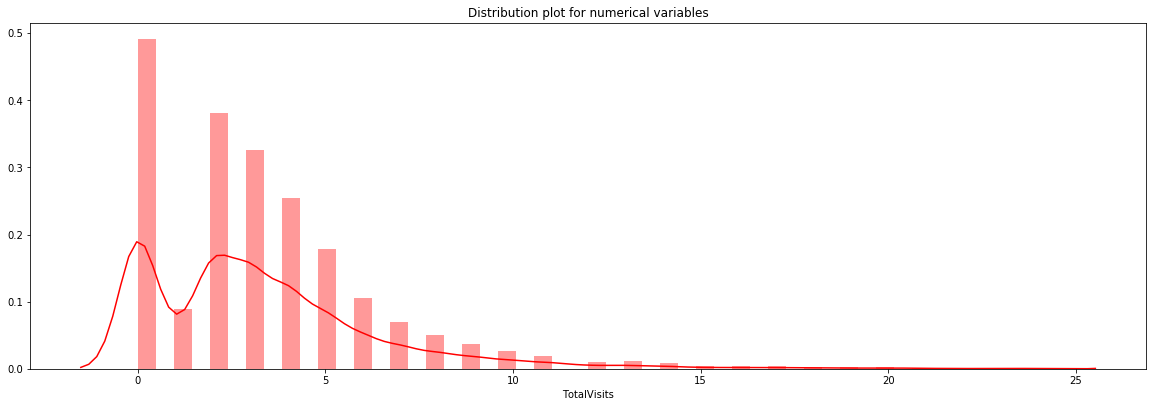

In [365]:
distribution_plot('TotalVisits','red')

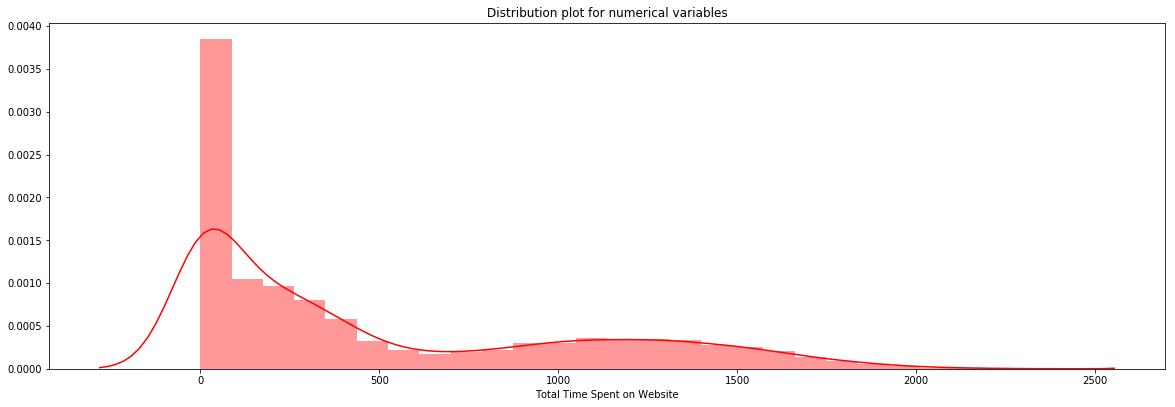

In [366]:
distribution_plot('Total Time Spent on Website','red')

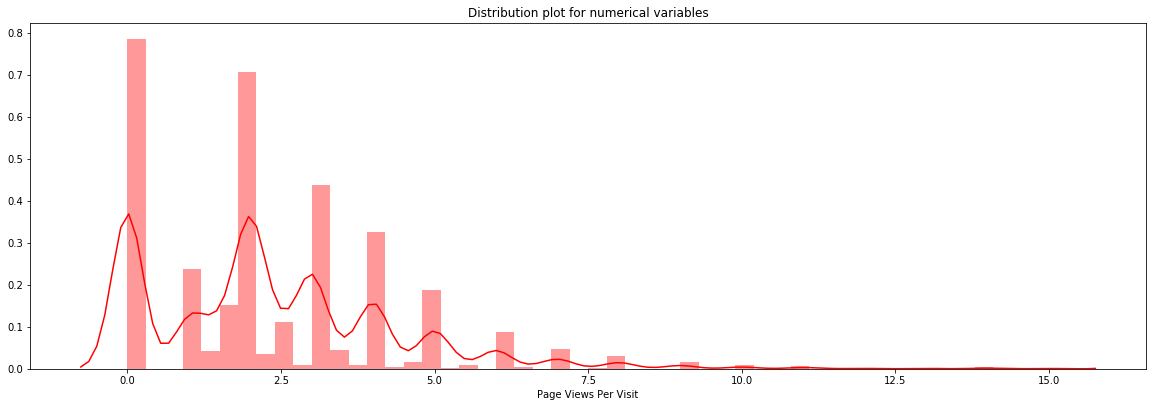

In [367]:
distribution_plot('Page Views Per Visit','red')

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    We can infer from the above plots that Website total visits are mainly around 0-10 visits. while total time spent on website is about 500 seconds and also it increases till 1500 seconds for few customers. Almost all the users are viewing around 2-5 pages minimum.
  
</font></p>

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
  Data is ready for modeling and analysis purpose now. All the steps of data preparation have been performed now.
</font></p>

In [368]:
#Taking the copy of main data frame to work with for modeling step
leads_df_2 = leads_df.copy()

In [369]:
leads_df_2.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                         

# Data Modeling:

### Split the data into training and testing dataset using train_test_split

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(leads_df_2, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the numerical features using StandardScaler

In [372]:
from sklearn.preprocessing import StandardScaler

In [373]:
scaler=StandardScaler()

In [374]:
# Apply StandardScaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [375]:
df_train.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
1841             0            0          0    -0.103450   
1761             0            0          1    -0.411258   
3581             1            0          0    -1.026874   
7363             0            0          0    -1.026874   
499              0            0          0    -1.026874   

      Total Time Spent on Website  Page Views Per Visit  \
1841                    -0.373624              0.318756   
1761                     0.193389             -0.667581   
3581                    -0.893080             -1.160749   
7363                    -0.893080             -1.160749   
499                     -0.893080             -1.160749   

      A free copy of Mastering The Interview  \
1841                                       0   
1761                                       0   
3581                                       0   
7363                                       0   
499                                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1841                                    1                          0   
1761                                    0                          0   
3581                                    0                          0   
7363                                    0                          0   
499                                     0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
1841                        0                           0   
1761                        0                           0   
3581                        0                           0   
7363                        0                           0   
499                         0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
1841                     0                   1                      0   
1761                     0                   1                      0   
3581                     0                   0                      0   
7363                     0                   0                      0   
499                      0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
1841                   0                       0                           0   
1761                   0                       0                           0   
3581                   0                       1                           0   
7363                   0                       1                           0   
499                    0                       1                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
1841                              0                          0   
1761                              0                          0   
3581                              0                          0   
7363                              0                          0   
499                               0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1841                      0                           0   
1761                      0                           0   
3581                      0                           0   
7363                      0                           0   
499                       0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
1841                         0                    0   
1761                         0                    0   
3581                         0                    0   
7363                         0                    0   
499                          0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
1841                             0                 0                 0   
1761                             0                 0    

In [376]:
df_train.describe()

Do Not Email  Do Not Call    Converted   TotalVisits  \
count   6421.000000  6421.000000  6421.000000  6.421000e+03   
mean       0.078492     0.000311     0.382339  1.508423e-16   
std        0.268966     0.017647     0.485997  1.000078e+00   
min        0.000000     0.000000     0.000000 -1.026874e+00   
25%        0.000000     0.000000     0.000000 -7.190662e-01   
50%        0.000000     0.000000     0.000000 -1.034497e-01   
75%        0.000000     0.000000     1.000000  5.121668e-01   
max        1.000000     1.000000     1.000000  6.360524e+00   

       Total Time Spent on Website  Page Views Per Visit  \
count                 6.421000e+03          6.421000e+03   
mean                 -3.922350e-17          2.577581e-17   
std                   1.000078e+00          1.000078e+00   
min                  -8.930804e-01         -1.160749e+00   
25%                  -8.693025e-01         -6.675808e-01   
50%                  -4.321540e-01         -1.744123e-01   
75%                   8.189319e-01          3.187561e-01   
max                   3.262573e+00          6.236777e+00   

       A free copy of Mastering The Interview  \
count                             6421.000000   
mean                                 0.311634   
std                                  0.463197   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6421.000000                6421.000000   
mean                              0.532939                   0.074755   
std                               0.498953                   0.263016   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              6421.000000                 6421.000000   
mean                  0.004984                    0.274256   
std                   0.070424                    0.446174   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
count           6421.000000         6421.000000            6421.000000   
mean               0.005139            0.312880               0.000311   
std                0.071511            0.463702               0.017647   
min                0.000000            0.000000               0.000000   
25%                0.000000            0.000000               0.000000   
50%                0.000000            0.000000               0.000000   
75%                0.000000            1.000000               0.000000   
max                1.000000            1.000000               1.000000   

       Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         6421.000000             6421.000000                 6421.000000   
mean             0.000156                0.191403                    0.126616   
std              0.012480                0.393436                    0.332568   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%  

Splitting the data into X and target variable y to be used for modeling

In [377]:
y_train = df_train.pop('Converted')
X_train = df_train

In [378]:
# Checking the Lead Conversion Rate
(sum(leads_df_2['Converted'])/len(leads_df_2['Converted'].index))*100

38.41709364439115

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
As mentioned in the problem statement, the lead conversion rate is only around 30% with the current data available. 
</font></p>

### Data modeling using Logistic Regression in combination with RFE

In [379]:
# Instantiate the logistic regression object using below module library

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [380]:
# Importing the RFE library

from sklearn.feature_selection import RFE

# We are trying to select top 25 features
rfe = RFE(log_reg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [381]:
rfe.ranking_

array([ 1,  1, 28,  1, 26, 46,  5,  1, 24,  9,  4, 11, 23,  1,  1, 10, 43,
       64, 51,  1, 14, 52,  1, 19, 39, 16, 60, 63, 45, 55,  1, 18,  1, 59,
       50,  3,  1,  1,  1,  1, 56,  1, 12, 42,  1,  1,  1,  1, 20, 57,  1,
       36, 21, 13, 49, 53, 37,  1, 35,  2,  1, 40, 62, 27, 44, 25, 47, 38,
       22, 48, 29,  1, 58, 30, 34, 31, 54, 33, 61,  8, 15, 32, 41, 17,  1,
        6,  7,  1])

In [382]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 64),
 ('Lead Source_Reference', False, 51),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 19),
 ('Lead Source_blog', False, 39),
 ('Lead Sour

In [383]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable', 'Lead Quality_High in Relevance',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Worst', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

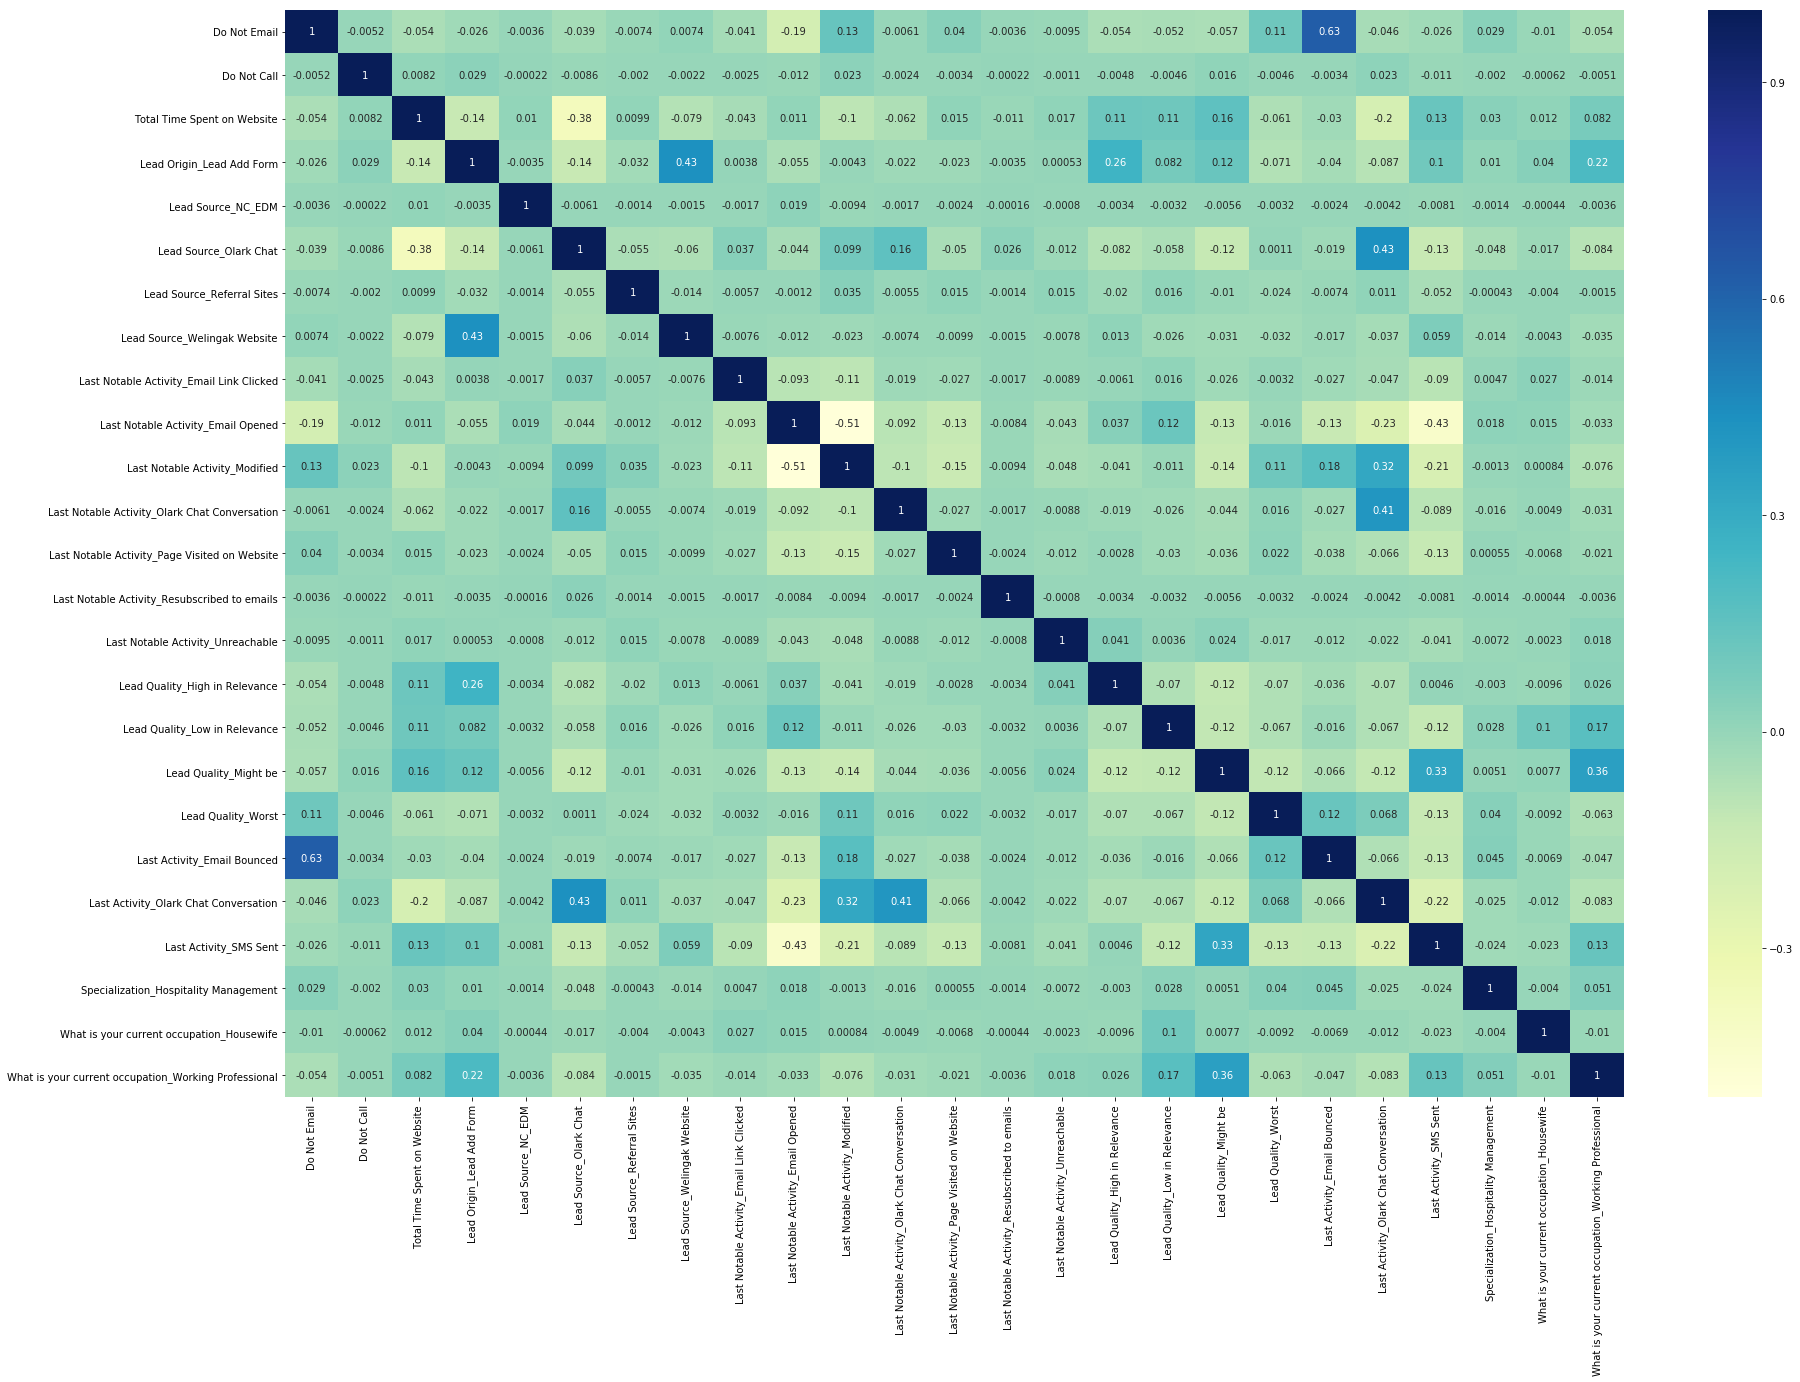

In [384]:
# Plotting heatmap to know the multicollinearity / correlation among the selected features

plt.figure(figsize = (30, 20))
cor=X_train[col].corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

In [385]:
# Creating X_train dataframe with RFE selected top 25 variables
X_train = X_train[col]

In [386]:
# Importing statmodels api library to work with top 25 features
import statsmodels.api as sm  

In [387]:
X_train_1 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_1, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2160.3
Date:                Mon, 06 Jan 2020   Deviance:                       4320.7
Time:                        21:51:14   Pearson chi2:                 6.15e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3027      0.181     -7.189      0.000      -1.658      -0.948
Do Not Email                                            -1.0637      0.219     -4.862      0.000      -1.493      -0.635
Do Not Call                                             22.9046   3.33e+04      0.001      0.999   -6.53e+04    6.54e+04
Total Time Spent on Website                              1.0852      0.045     24.373      0.000       0.998       1.172
Lead Origin_Lead Add Form                                2.4975      0.228     10.958      0.000       2.051       2.944
Lead Source_NC_EDM                                      23.5902   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.5044      0.118     12.786      0.000       1.274       1.735
Lead Source_Referral Sites                              -0.5410      0.411     -1.316      0.188      -1.347       0.265
Lead Source_Welingak Website                             4.4409      1.037      4.284      0.000       2.409       6.473
Last Notable Activity_Email Link Clicked                -0.9544      0.323     -2.955      0.003      -1.587      -0.321
Last Notable Activity_Email Opened                      -0.6001      0.188     -3.200      0.001      -0.968      -0.233
Last Notable Activity_Modified                          -1.2707      0.151     -8.407      0.000      -1.567      -0.974
Last Notable Activity_Olark Chat Conversation           -1.0716      0.429     -2.500      0.012      -1.912      -0.231
Last Notable Activity_Page Visited on Website           -0.8507      0.277     -3.071      0.002      -1.393      -0.308
Last Notable Activity_Resubscribed to emails            23.3335   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_Unreachable                        0.8104      0.617      1.314      0.189      -0.399       2.019
Lead Quality_High in Relevance                           3.6323      0.214     16.956      0.000       3.212       4.052
Lead Quality_Low in Relevance                            2.6592      0.161     16.537      0.000       2.344       2.974
Lead Quality_Might be                                    1.7139      0.105     16.323      0.000       1.508       1.920
Lead Quality_Worst                                      -2.0209      0.367     -5.504      0.000      -2.740      -1.301
Last Activity_Email Bounced                             -0.8741      0.436     -2.003      0.045      -1.729      -0.019
Last Activity_Olark Chat Conversation                   -0.7718      0.219     -3.531      0.000      -1.200      -0.343
Last Activity_SMS Sent                                   0.8207      0.165      4.977      0.000       0.497       1.144
Specialization_H

In [388]:
X_train.drop('Last Notable Activity_Resubscribed to emails', axis=1, inplace=True)

In [389]:
X_train_2 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.5
Date:                Mon, 06 Jan 2020   Deviance:                       4323.0
Time:                        21:51:14   Pearson chi2:                 6.15e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2824      0.181     -7.101      0.000      -1.636      -0.928
Do Not Email                                            -1.0674      0.219     -4.879      0.000      -1.496      -0.639
Do Not Call                                             22.9030   3.33e+04      0.001      0.999   -6.53e+04    6.54e+04
Total Time Spent on Website                              1.0851      0.045     24.370      0.000       0.998       1.172
Lead Origin_Lead Add Form                                2.4980      0.228     10.958      0.000       2.051       2.945
Lead Source_NC_EDM                                      23.5910   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.5098      0.118     12.841      0.000       1.279       1.740
Lead Source_Referral Sites                              -0.5423      0.411     -1.319      0.187      -1.348       0.263
Lead Source_Welingak Website                             4.4416      1.037      4.285      0.000       2.410       6.473
Last Notable Activity_Email Link Clicked                -0.9762      0.323     -3.027      0.002      -1.608      -0.344
Last Notable Activity_Email Opened                      -0.6213      0.187     -3.323      0.001      -0.988      -0.255
Last Notable Activity_Modified                          -1.2853      0.151     -8.515      0.000      -1.581      -0.989
Last Notable Activity_Olark Chat Conversation           -1.0860      0.429     -2.534      0.011      -1.926      -0.246
Last Notable Activity_Page Visited on Website           -0.8712      0.277     -3.150      0.002      -1.413      -0.329
Last Notable Activity_Unreachable                        0.7900      0.617      1.281      0.200      -0.419       1.999
Lead Quality_High in Relevance                           3.6312      0.214     16.951      0.000       3.211       4.051
Lead Quality_Low in Relevance                            2.6575      0.161     16.529      0.000       2.342       2.973
Lead Quality_Might be                                    1.7132      0.105     16.315      0.000       1.507       1.919
Lead Quality_Worst                                      -2.0218      0.367     -5.507      0.000      -2.741      -1.302
Last Activity_Email Bounced                             -0.8835      0.436     -2.025      0.043      -1.739      -0.028
Last Activity_Olark Chat Conversation                   -0.7813      0.218     -3.578      0.000      -1.209      -0.353
Last Activity_SMS Sent                                   0.8029      0.164      4.882      0.000       0.481       1.125
Specialization_Hospitality Management                   -0.7403      0.379     -1.954      0.051      -1.483       0.002
What is your cur

In [390]:
X_train.drop('Lead Source_NC_EDM', axis=1, inplace=True)

In [391]:
X_train_3 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.8
Date:                Mon, 06 Jan 2020   Deviance:                       4325.6
Time:                        21:51:15   Pearson chi2:                 6.15e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2814      0.181     -7.096      0.000      -1.635      -0.927
Do Not Email                                            -1.0674      0.219     -4.879      0.000      -1.496      -0.639
Do Not Call                                             22.9022   3.33e+04      0.001      0.999   -6.53e+04    6.54e+04
Total Time Spent on Website                              1.0855      0.045     24.381      0.000       0.998       1.173
Lead Origin_Lead Add Form                                2.4979      0.228     10.959      0.000       2.051       2.945
Lead Source_Olark Chat                                   1.5083      0.118     12.832      0.000       1.278       1.739
Lead Source_Referral Sites                              -0.5433      0.411     -1.322      0.186      -1.349       0.262
Lead Source_Welingak Website                             4.4401      1.037      4.283      0.000       2.408       6.472
Last Notable Activity_Email Link Clicked                -0.9759      0.322     -3.026      0.002      -1.608      -0.344
Last Notable Activity_Email Opened                      -0.6182      0.187     -3.307      0.001      -0.985      -0.252
Last Notable Activity_Modified                          -1.2854      0.151     -8.516      0.000      -1.581      -0.990
Last Notable Activity_Olark Chat Conversation           -1.0862      0.429     -2.534      0.011      -1.926      -0.246
Last Notable Activity_Page Visited on Website           -0.8717      0.277     -3.152      0.002      -1.414      -0.330
Last Notable Activity_Unreachable                        0.7898      0.617      1.281      0.200      -0.419       1.998
Lead Quality_High in Relevance                           3.6292      0.214     16.942      0.000       3.209       4.049
Lead Quality_Low in Relevance                            2.6553      0.161     16.515      0.000       2.340       2.970
Lead Quality_Might be                                    1.7118      0.105     16.303      0.000       1.506       1.918
Lead Quality_Worst                                      -2.0242      0.367     -5.513      0.000      -2.744      -1.305
Last Activity_Email Bounced                             -0.8833      0.436     -2.025      0.043      -1.738      -0.028
Last Activity_Olark Chat Conversation                   -0.7804      0.218     -3.574      0.000      -1.208      -0.352
Last Activity_SMS Sent                                   0.8026      0.164      4.880      0.000       0.480       1.125
Specialization_Hospitality Management                   -0.7417      0.379     -1.958      0.050      -1.484       0.001
What is your current occupation_Housewife               21.3645   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your cur

In [392]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [393]:
X_train_4 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_4, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2164.9
Date:                Mon, 06 Jan 2020   Deviance:                       4329.9
Time:                        21:51:16   Pearson chi2:                 6.17e+03
No. Iterations:                    19   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2749      0.181     -7.063      0.000      -1.629      -0.921
Do Not Email                                            -1.0704      0.219     -4.890      0.000      -1.499      -0.641
Do Not Call                                             20.8879   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Total Time Spent on Website                              1.0859      0.045     24.390      0.000       0.999       1.173
Lead Origin_Lead Add Form                                2.5154      0.227     11.061      0.000       2.070       2.961
Lead Source_Olark Chat                                   1.5074      0.118     12.823      0.000       1.277       1.738
Lead Source_Referral Sites                              -0.5507      0.411     -1.339      0.180      -1.357       0.255
Lead Source_Welingak Website                             4.4233      1.037      4.267      0.000       2.392       6.455
Last Notable Activity_Email Link Clicked                -0.9763      0.321     -3.037      0.002      -1.606      -0.346
Last Notable Activity_Email Opened                      -0.6248      0.187     -3.343      0.001      -0.991      -0.259
Last Notable Activity_Modified                          -1.2857      0.151     -8.512      0.000      -1.582      -0.990
Last Notable Activity_Olark Chat Conversation           -1.0870      0.429     -2.535      0.011      -1.927      -0.247
Last Notable Activity_Page Visited on Website           -0.8789      0.277     -3.177      0.001      -1.421      -0.337
Last Notable Activity_Unreachable                        0.7823      0.617      1.268      0.205      -0.427       1.991
Lead Quality_High in Relevance                           3.6261      0.214     16.930      0.000       3.206       4.046
Lead Quality_Low in Relevance                            2.6732      0.160     16.674      0.000       2.359       2.987
Lead Quality_Might be                                    1.7183      0.105     16.376      0.000       1.513       1.924
Lead Quality_Worst                                      -2.0246      0.367     -5.515      0.000      -2.744      -1.305
Last Activity_Email Bounced                             -0.8917      0.437     -2.042      0.041      -1.747      -0.036
Last Activity_Olark Chat Conversation                   -0.7868      0.218     -3.605      0.000      -1.215      -0.359
Last Activity_SMS Sent                                   0.7943      0.164      4.832      0.000       0.472       1.116
Specialization_Hospitality Management                   -0.7460      0.379     -1.968      0.049      -1.489      -0.003
What is your current occupation_Working Professional     1.8042      0.216      8.361      0.000       1.381       2.227
================

In [394]:
X_train.drop('Do Not Call', axis=1, inplace=True)

In [395]:
X_train_5 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_5, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2166.7
Date:                Mon, 06 Jan 2020   Deviance:                       4333.4
Time:                        21:51:17   Pearson chi2:                 6.17e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2689      0.180     -7.031      0.000      -1.623      -0.915
Do Not Email                                            -1.0736      0.219     -4.902      0.000      -1.503      -0.644
Total Time Spent on Website                              1.0871      0.045     24.421      0.000       1.000       1.174
Lead Origin_Lead Add Form                                2.5400      0.228     11.164      0.000       2.094       2.986
Lead Source_Olark Chat                                   1.5048      0.117     12.808      0.000       1.275       1.735
Lead Source_Referral Sites                              -0.5545      0.411     -1.349      0.177      -1.360       0.251
Lead Source_Welingak Website                             4.3993      1.037      4.244      0.000       2.368       6.431
Last Notable Activity_Email Link Clicked                -0.9818      0.322     -3.053      0.002      -1.612      -0.351
Last Notable Activity_Email Opened                      -0.6305      0.187     -3.374      0.001      -0.997      -0.264
Last Notable Activity_Modified                          -1.2862      0.151     -8.512      0.000      -1.582      -0.990
Last Notable Activity_Olark Chat Conversation           -1.1058      0.428     -2.583      0.010      -1.945      -0.267
Last Notable Activity_Page Visited on Website           -0.8849      0.277     -3.199      0.001      -1.427      -0.343
Last Notable Activity_Unreachable                        0.7769      0.617      1.260      0.208      -0.432       1.986
Lead Quality_High in Relevance                           3.6206      0.214     16.909      0.000       3.201       4.040
Lead Quality_Low in Relevance                            2.6692      0.160     16.651      0.000       2.355       2.983
Lead Quality_Might be                                    1.7206      0.105     16.403      0.000       1.515       1.926
Lead Quality_Worst                                      -2.0272      0.367     -5.522      0.000      -2.747      -1.308
Last Activity_Email Bounced                             -0.8942      0.437     -2.048      0.041      -1.750      -0.038
Last Activity_Olark Chat Conversation                   -0.7720      0.216     -3.567      0.000      -1.196      -0.348
Last Activity_SMS Sent                                   0.7876      0.164      4.793      0.000       0.465       1.110
Specialization_Hospitality Management                   -0.7486      0.379     -1.974      0.048      -1.492      -0.005
What is your current occupation_Working Professional     1.8006      0.216      8.343      0.000       1.378       2.224
========================================================================================================================
"""

In [396]:
X_train.drop('Last Notable Activity_Unreachable', axis=1, inplace=True)

In [397]:
X_train_6 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_6, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2167.5
Date:                Mon, 06 Jan 2020   Deviance:                       4335.0
Time:                        21:51:18   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2038      0.173     -6.959      0.000      -1.543      -0.865
Do Not Email                                            -1.0836      0.219     -4.946      0.000      -1.513      -0.654
Total Time Spent on Website                              1.0866      0.045     24.416      0.000       0.999       1.174
Lead Origin_Lead Add Form                                2.5371      0.228     11.145      0.000       2.091       2.983
Lead Source_Olark Chat                                   1.5027      0.117     12.794      0.000       1.272       1.733
Lead Source_Referral Sites                              -0.5496      0.408     -1.347      0.178      -1.349       0.250
Lead Source_Welingak Website                             4.4028      1.037      4.247      0.000       2.371       6.434
Last Notable Activity_Email Link Clicked                -1.0459      0.318     -3.293      0.001      -1.669      -0.423
Last Notable Activity_Email Opened                      -0.6950      0.180     -3.863      0.000      -1.048      -0.342
Last Notable Activity_Modified                          -1.3326      0.147     -9.067      0.000      -1.621      -1.045
Last Notable Activity_Olark Chat Conversation           -1.1518      0.427     -2.699      0.007      -1.988      -0.316
Last Notable Activity_Page Visited on Website           -0.9490      0.272     -3.489      0.000      -1.482      -0.416
Lead Quality_High in Relevance                           3.6250      0.214     16.940      0.000       3.206       4.044
Lead Quality_Low in Relevance                            2.6660      0.160     16.654      0.000       2.352       2.980
Lead Quality_Might be                                    1.7214      0.105     16.412      0.000       1.516       1.927
Lead Quality_Worst                                      -2.0294      0.367     -5.529      0.000      -2.749      -1.310
Last Activity_Email Bounced                             -0.9243      0.436     -2.118      0.034      -1.780      -0.069
Last Activity_Olark Chat Conversation                   -0.7894      0.216     -3.657      0.000      -1.212      -0.366
Last Activity_SMS Sent                                   0.7323      0.159      4.619      0.000       0.422       1.043
Specialization_Hospitality Management                   -0.7537      0.379     -1.987      0.047      -1.497      -0.010
What is your current occupation_Working Professional     1.8027      0.216      8.360      0.000       1.380       2.225
========================================================================================================================
"""

In [398]:
X_train.drop('Lead Source_Referral Sites', axis=1, inplace=True)

In [399]:
X_train_7 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_7, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2168.5
Date:                Mon, 06 Jan 2020   Deviance:                       4337.0
Time:                        21:51:19   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2205      0.173     -7.071      0.000      -1.559      -0.882
Do Not Email                                            -1.0867      0.219     -4.962      0.000      -1.516      -0.657
Total Time Spent on Website                              1.0875      0.045     24.433      0.000       1.000       1.175
Lead Origin_Lead Add Form                                2.5469      0.228     11.193      0.000       2.101       2.993
Lead Source_Olark Chat                                   1.5122      0.117     12.891      0.000       1.282       1.742
Lead Source_Welingak Website                             4.4015      1.037      4.246      0.000       2.370       6.433
Last Notable Activity_Email Link Clicked                -1.0422      0.318     -3.278      0.001      -1.665      -0.419
Last Notable Activity_Email Opened                      -0.6845      0.180     -3.809      0.000      -1.037      -0.332
Last Notable Activity_Modified                          -1.3333      0.147     -9.074      0.000      -1.621      -1.045
Last Notable Activity_Olark Chat Conversation           -1.1482      0.427     -2.692      0.007      -1.984      -0.312
Last Notable Activity_Page Visited on Website           -0.9395      0.272     -3.457      0.001      -1.472      -0.407
Lead Quality_High in Relevance                           3.6288      0.214     16.949      0.000       3.209       4.048
Lead Quality_Low in Relevance                            2.6595      0.160     16.658      0.000       2.347       2.972
Lead Quality_Might be                                    1.7207      0.105     16.413      0.000       1.515       1.926
Lead Quality_Worst                                      -2.0241      0.367     -5.514      0.000      -2.744      -1.305
Last Activity_Email Bounced                             -0.9110      0.436     -2.090      0.037      -1.765      -0.057
Last Activity_Olark Chat Conversation                   -0.7876      0.216     -3.645      0.000      -1.211      -0.364
Last Activity_SMS Sent                                   0.7460      0.158      4.715      0.000       0.436       1.056
Specialization_Hospitality Management                   -0.7466      0.379     -1.968      0.049      -1.490      -0.003
What is your current occupation_Working Professional     1.8028      0.216      8.353      0.000       1.380       2.226
========================================================================================================================
"""

In [400]:
X_train.drop('Specialization_Hospitality Management', axis=1, inplace=True)

In [401]:
X_train_8 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_8, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6402
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2170.5
Date:                Mon, 06 Jan 2020   Deviance:                       4340.9
Time:                        21:51:21   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2286      0.172     -7.130      0.000      -1.566      -0.891
Do Not Email                                            -1.0961      0.219     -5.008      0.000      -1.525      -0.667
Total Time Spent on Website                              1.0842      0.044     24.393      0.000       0.997       1.171
Lead Origin_Lead Add Form                                2.5430      0.228     11.172      0.000       2.097       2.989
Lead Source_Olark Chat                                   1.5163      0.117     12.929      0.000       1.286       1.746
Lead Source_Welingak Website                             4.4111      1.037      4.255      0.000       2.379       6.443
Last Notable Activity_Email Link Clicked                -1.0446      0.318     -3.281      0.001      -1.669      -0.421
Last Notable Activity_Email Opened                      -0.6847      0.179     -3.815      0.000      -1.036      -0.333
Last Notable Activity_Modified                          -1.3304      0.147     -9.069      0.000      -1.618      -1.043
Last Notable Activity_Olark Chat Conversation           -1.1383      0.426     -2.670      0.008      -1.974      -0.303
Last Notable Activity_Page Visited on Website           -0.9336      0.272     -3.435      0.001      -1.466      -0.401
Lead Quality_High in Relevance                           3.6270      0.214     16.944      0.000       3.207       4.047
Lead Quality_Low in Relevance                            2.6538      0.159     16.664      0.000       2.342       2.966
Lead Quality_Might be                                    1.7216      0.105     16.420      0.000       1.516       1.927
Lead Quality_Worst                                      -2.0184      0.367     -5.504      0.000      -2.737      -1.300
Last Activity_Email Bounced                             -0.9210      0.437     -2.109      0.035      -1.777      -0.065
Last Activity_Olark Chat Conversation                   -0.7922      0.216     -3.665      0.000      -1.216      -0.369
Last Activity_SMS Sent                                   0.7488      0.158      4.740      0.000       0.439       1.058
What is your current occupation_Working Professional     1.7670      0.214      8.254      0.000       1.347       2.187
========================================================================================================================
"""

In [402]:
X_train.drop('Last Activity_Email Bounced', axis=1, inplace=True)

In [403]:
X_train_9 = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_9, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6403
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2172.9
Date:                Mon, 06 Jan 2020   Deviance:                       4345.7
Time:                        21:51:22   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2939      0.170     -7.615      0.000      -1.627      -0.961
Do Not Email                                            -1.3164      0.198     -6.649      0.000      -1.705      -0.928
Total Time Spent on Website                              1.0828      0.044     24.375      0.000       0.996       1.170
Lead Origin_Lead Add Form                                2.5605      0.228     11.214      0.000       2.113       3.008
Lead Source_Olark Chat                                   1.5124      0.117     12.903      0.000       1.283       1.742
Lead Source_Welingak Website                             4.3973      1.036      4.243      0.000       2.366       6.429
Last Notable Activity_Email Link Clicked                -0.9778      0.317     -3.085      0.002      -1.599      -0.357
Last Notable Activity_Email Opened                      -0.6176      0.177     -3.493      0.000      -0.964      -0.271
Last Notable Activity_Modified                          -1.3012      0.145     -8.945      0.000      -1.586      -1.016
Last Notable Activity_Olark Chat Conversation           -1.1042      0.426     -2.592      0.010      -1.939      -0.269
Last Notable Activity_Page Visited on Website           -0.8518      0.270     -3.160      0.002      -1.380      -0.323
Lead Quality_High in Relevance                           3.6267      0.214     16.925      0.000       3.207       4.047
Lead Quality_Low in Relevance                            2.6420      0.159     16.653      0.000       2.331       2.953
Lead Quality_Might be                                    1.7249      0.105     16.453      0.000       1.519       1.930
Lead Quality_Worst                                      -2.0335      0.366     -5.552      0.000      -2.751      -1.316
Last Activity_Olark Chat Conversation                   -0.7516      0.216     -3.487      0.000      -1.174      -0.329
Last Activity_SMS Sent                                   0.8199      0.155      5.299      0.000       0.517       1.123
What is your current occupation_Working Professional     1.7698      0.215      8.251      0.000       1.349       2.190
========================================================================================================================
"""

In [404]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [405]:
#defining a function to automate vif calculation
def vif_cal(lead_df):
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = lead_df.columns
    vif['VIF'] = [variance_inflation_factor(lead_df.values, i) for i in range(lead_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [406]:
vif_cal(X_train)

Features   VIF
14              Last Activity_Olark Chat Conversation  1.95
3                              Lead Source_Olark Chat  1.74
2                           Lead Origin_Lead Add Form  1.72
12                              Lead Quality_Might be  1.67
7                      Last Notable Activity_Modified  1.64
15                             Last Activity_SMS Sent  1.47
16  What is your current occupation_Working Profes...  1.37
1                         Total Time Spent on Website  1.33
8       Last Notable Activity_Olark Chat Conversation  1.31
4                        Lead Source_Welingak Website  1.31
10                     Lead Quality_High in Relevance  1.28
6                  Last Notable Activity_Email Opened  1.27
11                      Lead Quality_Low in Relevance  1.23
0                                        Do Not Email  1.13
13                                 Lead Quality_Worst  1.12
9       Last Notable Activity_Page Visited on Website  1.03
5            Last Notable Activity_Email Link Clicked  1.02

In [407]:
X_train.shape

(6421, 17)

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
In all the above modeling steps, while applying statmodels api to the training data, we checked for p-values and dropped all those columns with high p-values to make more significant model. Also checked and calculated VIF score, to report any multicollinearity if it exists among the many variables. VIF score for all the columns look fine.
    <br> and Finally, found the list of more impactful features for lead scoring
</font></p>

### Prediction on training data

In [408]:
# Predict y value on y_train set
y_train_pred = res.predict(X_train_9)
y_train_pred[:10]

1841    0.047439
1761    0.915085
3581    0.033369
7363    0.203245
499     0.016573
6886    0.015466
3168    0.992071
6935    0.067419
4383    0.074849
6892    0.986475
dtype: float64

Text(0.5,0,'Errors')

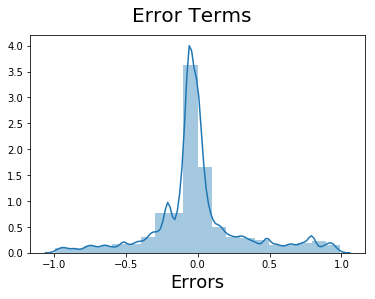

In [409]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
We can observe that error terms are normally distributed. 
</font></p>

In [410]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04743943, 0.91508459, 0.03336904, 0.2032452 , 0.01657304,
       0.01546571, 0.99207149, 0.06741914, 0.07484931, 0.98647468])

In [411]:
y_train.head()

1841    0
1761    1
3581    0
7363    0
499     0
Name: Converted, dtype: int64

In [412]:
# Making a final dataframe with actual values and predicted values with unique lead index 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.047439         1841
1          1        0.915085         1761
2          0        0.033369         3581
3          0        0.203245         7363
4          0        0.016573          499

In [413]:
# Keeping the threshold probability as 0.5 and calculate the "Converted" flag value from the predicted probability

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.047439         1841          0
1          1        0.915085         1761          1
2          0        0.033369         3581          0
3          0        0.203245         7363          0
4          0        0.016573          499          0

### Calculate Accuracy, Specificity and Sensitivity using Confusion matrix 

In [414]:
# Importing the necessary library for creating confusion matrix
from sklearn import metrics

In [415]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3592  374]
 [ 544 1911]]


In [416]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8570316150132378


In [417]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [418]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7784114052953157

In [419]:
# Let us calculate specificity
TN / float(TN+FP)

0.9056984367120524

In [420]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.09430156328794756


In [421]:
# positive predictive value 
print (TP / float(TP+FP))

0.8363238512035011


In [422]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8684719535783365


In [423]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [424]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

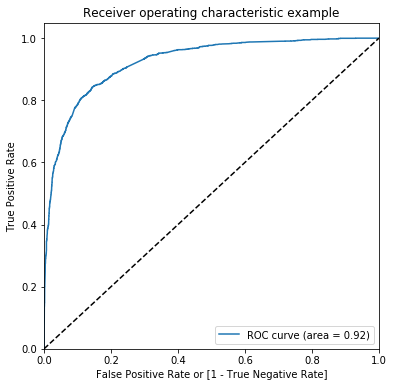

(array([0.        , 0.        , 0.        , ..., 0.99949571, 0.99974786,
        1.        ]),
 array([4.07331976e-04, 8.14663951e-04, 1.22199593e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([9.99893090e-01, 9.99833074e-01, 9.99795230e-01, ...,
        7.23983895e-04, 7.06992646e-04, 5.56424536e-04]))

In [425]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [426]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob))

'0.92'

<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
We have built quiet a stable model here. <br>But, As the CEO expects the conversion rate to be around 80% - Sensitivity around 80% 
- let's find the optimal cutoff point for probabilities
</font></p>

In [427]:
# As the CEO expects the conversion rate to be around 80% - Sensitivity around 80% 
# - let's find the optimal cutoff point for probabilities

In [428]:
numbers = [0.0, 0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.047439         1841          0    1    0    0    0    0   
1          1        0.915085         1761          1    1    1    1    1    1   
2          0        0.033369         3581          0    1    0    0    0    0   
3          0        0.203245         7363          0    1    1    1    0    0   
4          0        0.016573          499          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [429]:
# Calculating Accuracy, sensitivity and specificity for various probability cutoffs to find the optimal value for cutoff

prob_cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in numbers:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    prob_cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

In [430]:
prob_cutoff_df

probability  accuracy  sensitivity  specificity
0.0          0.0  0.382339     1.000000     0.000000
0.1          0.1  0.727301     0.963340     0.581190
0.2          0.2  0.791621     0.931568     0.704992
0.3          0.3  0.837409     0.856619     0.825517
0.4          0.4  0.853294     0.815886     0.876450
0.5          0.5  0.857032     0.778411     0.905698
0.6          0.6  0.849245     0.716090     0.931669
0.7          0.7  0.834605     0.643992     0.952597
0.8          0.8  0.816539     0.562118     0.974029
0.9          0.9  0.774490     0.433809     0.985376

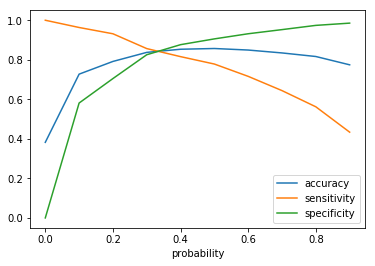

In [431]:
# plot between accuracy sensitivity and specificity for various probabilities.

prob_cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
We can clearly see from the above plot that, 0.35 is the optimal probability cutoff point. 
</font></p>

In [432]:
# Now, using the same cut-off of 0.35, calcuting final predicted probabilities again and cross check the confusion matrix again

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.047439         1841          0    1    0    0    0    0   
1          1        0.915085         1761          1    1    1    1    1    1   
2          0        0.033369         3581          0    1    0    0    0    0   
3          0        0.203245         7363          0    1    1    1    0    0   
4          0        0.016573          499          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    1                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [433]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8503348388101541

In [434]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3406,  560],
       [ 401, 2054]], dtype=int64)

In [435]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [436]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8366598778004073

In [437]:
# Let us calculate specificity
TN / float(TN+FP)

0.8587997982854261

In [438]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14120020171457387


In [439]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7857689364957919


In [440]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8946677173627529



<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
 As we can see from the above that we have achieved sensitivity around 80% as required on the training data using the optimal cut-off. 
    <br><br>Now, Let's check the predictions on the test dataset 
 
</font></p>

In [441]:
# Dropping the constant variable from final X_train

In [442]:
X_train_final = X_train_9.drop('const',axis=1)

In [443]:
# Applying StandardScaler on test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [444]:
#seperating target variable from test
y_test = df_test.pop('Converted')
X_test = df_test

In [445]:
# Only considering final set of columns for test data
X_test = X_test[X_train_final.columns]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5900             0                    -0.893080                          0   
7164             0                    -0.893080                          0   
7644             0                     1.340218                          0   
490              0                    -0.168768                          0   
9031             1                     1.998684                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
5900                       1                             0   
7164                       1                             0   
7644                       0                             0   
490                        0                             0   
9031                       0                             0   

      Last Notable Activity_Email Link Clicked  \
5900                                         0   
7164                                         0   
7644                                         0   
490                                          0   
9031                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
5900                                   0                               1   
7164                                   0                               1   
7644                                   0                               0   
490                                    1                               0   
9031                                   0                               0   

      Last Notable Activity_Olark Chat Conversation  \
5900                                              0   
7164                                              0   
7644                                              0   
490                                               0   
9031                                              0   

      Last Notable Activity_Page Visited on Website  \
5900                                              0   
7164                                              0   
7644                                              0   
490                                               0   
9031                                              0   

      Lead Quality_High in Relevance  Lead Quality_Low in Relevance  \
5900                               0                              0   
7164                               0                              0   
7644                               0                              0   
490                                0                              0   
9031                               0                              1   

      Lead Quality_Might be  Lead Quality_Worst  \
5900                      0                   0   
7164                      0                   0   
7644                      0                   0   
490                       0                   0   
9031                      0                   0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
5900                                      1                       0   
7164                                      0                       0   
7644                                      0                       1   
490                                       0                       0   
9031                                      0                       0   

      What is your current occupation_Working Professional  
5900                                                  0     
7164                                                  0     
7644                                                  0     
490                                                   0     
9031                                                  1

In [446]:
X_test.shape

(2752, 17)

In [447]:
# Adding constant to test data
X_test_sm = sm.add_constant(X_test)

In [448]:
# predicting on test data
y_test_pred = res.predict(X_test_sm)

In [449]:
y_test_pred[:10]

5900    0.057251
7164    0.114078
7644    0.726539
490     0.109655
9031    0.981395
5492    0.944419
5470    0.948012
2473    0.964561
291     0.015959
6946    0.445529
dtype: float64

Text(0.5,0,'Errors')

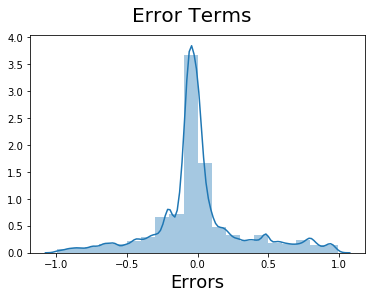

In [450]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

<b>We can observe that Error terms are normally distributed even for Test data </b>

In [451]:
# Creating a dataframe with actual and predicted values 

y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [452]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [453]:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [454]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         5900  0.057251
1          0         7164  0.114078
2          1         7644  0.726539
3          0          490  0.109655
4          1         9031  0.981395

In [455]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [456]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          0         5900        0.057251
1          0         7164        0.114078
2          1         7644        0.726539
3          0          490        0.109655
4          1         9031        0.981395

In [457]:
# Applying the same cut-off for probability as applied for training data (0.35)

y_pred_final['predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [458]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob  predicted
0          0         5900        0.057251          0
1          0         7164        0.114078          0
2          1         7644        0.726539          1
3          0          490        0.109655          0
4          1         9031        0.981395          1

In [459]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8481104651162791

In [460]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion3

array([[1430,  253],
       [ 165,  904]], dtype=int64)

In [461]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [462]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8366598778004073

In [463]:
# Let us calculate specificity
TN / float(TN+FP)

0.8587997982854261


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
 It's clearly observed that We have achieved the 80% sensitivity score even on TEST dataset as asked by CEO of the company.
 
</font></p>

## Lead Score Calculation

In [464]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob  predicted
0          0         5900        0.057251          0
1          0         7164        0.114078          0
2          1         7644        0.726539          1
3          0          490        0.109655          0
4          1         9031        0.981395          1

In [465]:
#lead score for all the leads in the test dataset from range (1-100)

y_pred_final['Lead Score'] = y_pred_final['Converted_Prob'] * 100
y_pred_final.head(10)

Converted  Prospect ID  Converted_Prob  predicted  Lead Score
0          0         5900        0.057251          0    5.725058
1          0         7164        0.114078          0   11.407826
2          1         7644        0.726539          1   72.653940
3          0          490        0.109655          0   10.965452
4          1         9031        0.981395          1   98.139507
5          1         5492        0.944419          1   94.441891
6          1         5470        0.948012          1   94.801224
7          1         2473        0.964561          1   96.456141
8          0          291        0.015959          0    1.595860
9          1         6946        0.445529          1   44.552948

# Conclusion :::

In [466]:
res.params

const                                                  -1.293908
Do Not Email                                           -1.316444
Total Time Spent on Website                             1.082784
Lead Origin_Lead Add Form                               2.560523
Lead Source_Olark Chat                                  1.512415
Lead Source_Welingak Website                            4.397253
Last Notable Activity_Email Link Clicked               -0.977797
Last Notable Activity_Email Opened                     -0.617628
Last Notable Activity_Modified                         -1.301238
Last Notable Activity_Olark Chat Conversation          -1.104239
Last Notable Activity_Page Visited on Website          -0.851817
Lead Quality_High in Relevance                          3.626680
Lead Quality_Low in Relevance                           2.641993
Lead Quality_Might be                                   1.724879
Lead Quality_Worst                                     -2.033522
Last Activity_Olark Chat 

In [467]:
X_train_final.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [468]:
type(res.params)

pandas.core.series.Series


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    We can conclude that below features are of utmost importance when it comes to increasing the lead conversion rate for the online company selling courses. <br>
    Also while doing the univariate and segmented univariate analysis, Below variables were proved to be more influential for increasing conversion rate.
     <br><br>
   1. Total Time spent on Website<br>
   2. Lead origin with add form <br>
   3. Lead Source with values (Olark chat,  Welingak Website) <br>
   4. Lead Quality (High, low)<br>
   5. Last Activity performed by the user, can be anything like ranging from chat, SMS etc.<br>
   6. Current occupation like working profesional <br><br>
   
   And as asked by CEO, they really help in getting the higher number of leads getting converted into enrolling for courses offered by the X online company.
    
</font></p>